In [1]:
%pylab inline
from classy import *

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib
Version  1.0.6
Version:  0.0.34


In [2]:
images=image.load_images('data/films')

[test]: 0 files found
[train]: 0 files found


/Users/bblais/python/work/classy/examples/classy/image.py:349: UserWarning: Look's like your folders are not organized as expected. We're expecting something like
data/films/
    target_name1/
        image1.jpg                    
        image2.jpg                    
        image3.jpg                    
    target_name2/
        image4.jpg                    
        image5.jpg                    
        image6.jpg                    
etc...                    
                    
  warnings.warn("""Look's like your folders are not organized as expected. We're expecting something like


## Load the Images and Reshape into vectors-targets

In [3]:
images=image.load_images('data/digits')

[9]: 180 files found
[0]: 178 files found
[7]: 179 files found
[6]: 181 files found
[1]: 182 files found
[8]: 174 files found
[4]: 181 files found
[3]: 183 files found
[2]: 177 files found
[5]: 182 files found


In [4]:
data=image.images_to_vectors(images)

1797 vectors of length 64
Feature names: 'p0', 'p1', 'p2', 'p3', 'p4'  , ... ,  'p59', 'p60', 'p61', 'p62', 'p63'  (64 features)
Target values given.
Target names: '9', '0', '7', '6', '1', '8', '4', '3', '2', '5'
Mean:  [0.00000000e+00 4.71341124e+00 8.25158598e+01 1.88401224e+02
 1.88589872e+02 9.17840846e+01 2.15581525e+01 2.04785754e+00
 8.51419032e-02 3.14913745e+01 1.65203116e+02 1.90677240e+02
 1.63504174e+02 1.30023372e+02 2.92036728e+01 1.70005565e+00
 4.22927101e-02 4.11185309e+01 1.57575960e+02 1.11080690e+02
 1.12814691e+02 1.24173066e+02 2.82609905e+01 7.82971619e-01
 1.66944908e-02 3.90011130e+01 1.44642181e+02 1.40286589e+02
 1.58007791e+02 1.20022816e+02 3.66889260e+01 3.33889816e-02
 0.00000000e+00 3.70083472e+01 1.21928770e+02 1.44347245e+02
 1.63978854e+02 1.39081803e+02 4.60222593e+01 0.00000000e+00
 1.37451308e-01 2.49860879e+01 1.09460768e+02 1.14961046e+02
 1.21993879e+02 1.30974958e+02 5.47762938e+01 4.24040067e-01
 1.13522538e-01 1.10378408e+01 1.19312187e+02 1.

In [5]:
data.vectors.shape

(1797, 64)

In [6]:
data_train,data_test=split(data)

Original vector shape:  (1797, 64)
Train vector shape:  (1347, 64)
Test vector shape:  (450, 64)


## View one of the vectors, and possibly save it to a file

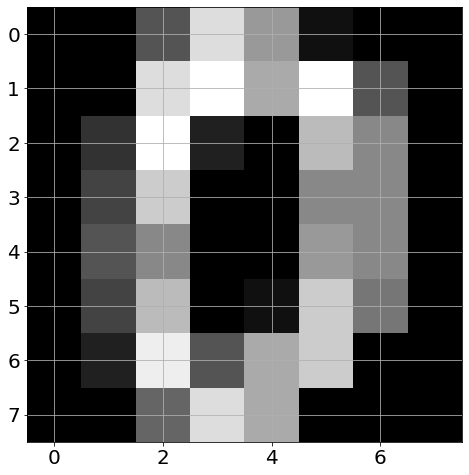

In [7]:
image.vector_to_image(data_train.vectors[800,:],(8,8))

only do this if you want to save the actual image

In [8]:
image.vector_to_image(data_train.vectors[800,:],(8,8),'test.png')

## Classification

In [9]:
C=NaiveBayes()

In [10]:
timeit(reset=True)
C.fit(data_train.vectors,data_train.targets)
print(("Training time: ",timeit()))

Time Reset
('Training time: ', '0.0041239261627197266 seconds ')


In [11]:
print(("On Training Set:",C.percent_correct(data_train.vectors,data_train.targets)))
print(("On Test Set:",C.percent_correct(data_test.vectors,data_test.targets)))

('On Training Set:', 92.87305122494432)
('On Test Set:', 91.11111111111111)


In [12]:
C=CSC()

In [13]:
timeit(reset=True)
C.fit(data_train.vectors,data_train.targets)
print(("Training time: ",timeit()))

Time Reset
('Training time: ', '0.8062427043914795 seconds ')


In [14]:
print(("On Training Set:",C.percent_correct(data_train.vectors,data_train.targets)))
print(("On Test Set:",C.percent_correct(data_test.vectors,data_test.targets)))

('On Training Set:', 100.0)
('On Test Set:', 96.22222222222221)


## Footnote

### Loading Files with Patterns

Here is a little note about how to load data from folders, using the filenames and not the folder structure.  

In [15]:
from classy import *

here the pattern translates to (note the asterisks "*" in the pattern)

* "data/digits/(all folders)/(any .png file starting with 133)"
* "data/digits/(all folders)/(any .png file starting with 123)"

In [16]:
data=image.load_images_from_filepatterns(this='data/digits/*/133*.png',
                                         that='data/digits/*/123*.png',
                                         )

[that]: 11 files found
	data/digits/9/1230.png
	data/digits/0/1235.png
	data/digits/0/1236.png
	data/digits/7/1238.png
	data/digits/6/1239.png
	data/digits/1/1237.png
	data/digits/8/1233.png
	data/digits/8/123.png
	data/digits/2/1232.png
	data/digits/2/1234.png
	data/digits/5/1231.png
[this]: 11 files found
	data/digits/0/1336.png
	data/digits/0/1335.png
	data/digits/7/1330.png
	data/digits/7/1331.png
	data/digits/7/1339.png
	data/digits/1/1334.png
	data/digits/3/1332.png
	data/digits/3/133.png
	data/digits/2/1337.png
	data/digits/2/1338.png
	data/digits/5/1333.png


In [17]:
summary(data)

Images
22 images of shape (8, 8)
Target values given.
Target names: 'that', 'this'
[that]: 11 files
[this]: 11 files
